### Objective
A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans.

The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best.

and the higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber.

Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


Exploratory Data Analysis
- Problem definition - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

### Import required libraries:

In [143]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier


# To tune model, get different metric scores, and split data
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    #plot_roc_curve,
    r2_score,
    mean_squared_error,
    mean_absolute_error
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
from ydata_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [135]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn
!pip install ydata-profiling
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Import data

In [6]:
roaster_data=pd.read_csv(r'C:\Users\prasa\OneDrive\Desktop\GreatLearning\FeatureEngineering\Project2\Roasters.csv')

### Data Summary

In [7]:
roaster_data.head()

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
0         212         210         211         347         353         347   
1         212         211         211         346         352         346   
2         212         211         211         345         352         346   
3         213         211         211         344         351         346   
4         213         211         211         343         350         346   

   T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
0         474         473         481         346         348         355   
1         475         473         481         349         348         355   
2         476         473         481         352         349         355   
3         477         473         481         355         349         355   
4         478         473         482         358         349         355   

   T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
0         241         241         243 167.850    9.220       61  
1         241         241         243 162.510    9.220       57  
2         242         241         242 164.990    9.220       61  
3         242         241         242 167.340    9.220       63  
4         243         241         242 163.040    9.220       63

In [8]:
roaster_data.shape

(29131, 18)

In [6]:
roaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


In [9]:
# Creating a copy dataset for analysis

data = roaster_data.copy()

In [10]:
# let's view the last 5 rows of the data
data.tail()

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
29126         275         276         266         180         376         356   
29127         275         276         266         181         376         355   
29128         275         276         266         183         376         354   
29129         275         276         265         185         376         354   
29130         274         276         265         187         376         353   

       T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
29126         495         506         486         341         337         308   
29127         495         507         486         341         337         308   
29128         495         507         486         341         337         307   
29129         495         507         486         341         337         307   
29130         496         508         486         341         337         307   

       T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
29126         234         220         223 154.120    6.190       77  
29127         234         220         224 158.790    6.190       82  
29128         234         219         224 154.830    6.190       82  
29129         234         219         224 153.680    6.190       82  
29130         234         219         224 155.640    6.190       82

#### Data Types

In [10]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


#### Observations

<br>There are a total of 18 columns and 29,131 observations in the dataset
<br>We can see that H_data and AH_data have less than 29,131 non-null values i.e. columns have missing values.
<br> There are 16 columns with integer and 2 columns with float values and there no categorical columns

#### Duplicates

In [11]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

#### Observation: There are no missing values in the data

#### Missing data

In [12]:
# let's check for missing values in the data
df_null_summary = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

#### Observation:There are missing values in H_data and AH_data columns. 

#### Unique values for Category columns

In [14]:
data.select_dtypes(include="object").nunique()

Series([], dtype: float64)

#### Unique values for Numerical Columns

In [15]:
data.select_dtypes(exclude="object").nunique()

T_data_1_1     271
T_data_1_2     172
T_data_1_3     157
T_data_2_1     311
T_data_2_2     386
T_data_2_3     286
T_data_3_1     444
T_data_3_2     268
T_data_3_3     663
T_data_4_1     471
T_data_4_2     474
T_data_4_3     418
T_data_5_1     188
T_data_5_2     217
T_data_5_3     219
H_data        5188
AH_data        290
quality         56
dtype: int64

Age has only 45 unique values i.e. most of the customers are of similar age

#### Numerical column statistics

In [16]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count    mean    std     min     25%     50%     75%      max
T_data_1_1 29131.000 253.552 32.488  13.000 232.000 252.000 280.000  343.000
T_data_1_2 29131.000 254.078 30.025 168.000 231.000 254.000 280.000  341.000
T_data_1_3 29131.000 254.058 28.977 183.000 232.000 252.000 279.000  339.000
T_data_2_1 29131.000 343.076 32.544  70.000 325.000 344.000 363.000  436.000
T_data_2_2 29131.000 344.524 33.719 113.000 326.000 344.000 364.000  598.000
T_data_2_3 29131.000 342.017 31.031 107.000 322.500 343.000 363.000  433.000
T_data_3_1 29131.000 494.513 50.315 311.000 461.000 497.000 524.000 1024.000
T_data_3_2 29131.000 495.851 43.756 401.000 460.000 498.000 527.000  756.000
T_data_3_3 29131.000 500.775 64.996 197.000 460.000 499.000 530.000  934.000
T_data_4_1 29131.000 345.081 43.405  53.000 324.000 343.000 362.000  912.000
T_data_4_2 29131.000 342.738 38.340  51.000 322.000 343.000 362.000  613.000
T_data_4_3 29131.000 345.234 35.052  52.000 326.000 344.000 361.000  695.000
T_data_5_1 29131.000 245.814 25.499 114.000 226.000 245.000 267.000  319.000
T_data_5_2 29131.000 246.304 26.520 145.000 226.000 245.000 266.000  361.000
T_data_5_3 29131.000 245.757 26.051 146.000 225.000 247.000 266.000  374.000
H_data     29087.000 171.127 14.079 144.410 157.350 170.470 182.135  203.680
AH_data    29100.000   7.551  1.123   4.380   6.810   7.520   8.320   10.740
quality    29131.000  64.322 16.397   0.000  54.000  66.000  77.000  100.000

#### Observations

<br>1.The gap between min and median for the first sensors of all chambers except 3rd chamber is high.
<br>2.Quality is ranging from 0 to 100 and median quality of beans stands at 66.
<br>3.The minimum temparatures of 1st sensor and other sensors of the same chamber vary a lot.
<br>4.Except the 3rd chamber the median values of the temperatures for other chambers are close.


<br>1.The target variable Attrition Flag has Existing to Attrited ratio of 83.9 : 16.1. There is imbalance in the dataset
<br>2.~93% customers are having Blue Card
<br>3.Income Category has a value abc for 10% records, which we'll change to Unknown

#### Pre-EDA data processing

### Exploratory Data Analysis

#### Univariate Analysis

#### Numerical Feature Summary

<br>The first step of univariate analysis is to check the distribution/spread of the data.
<br>This is done using primarily histograms and box plots. Additionally we'll plot each numerical feature on violin plot and cumulative density distribution plot. 
<br>For these 4 kind of plots, we are building below summary() function to plot each of the numerical attributes. 
<br>Also, we'll display feature-wise 5 point summary.

In [17]:
def summary(data: pd.DataFrame, x: str):
    """
    The function prints the 5 point summary and histogram, box plot,
    violin plot, and cumulative density distribution plots for each
    feature name passed as the argument.

    Parameters:
    ----------

    x: str, feature name

    Usage:
    ------------

    summary('age')
    """
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)

    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of T_data_1_1 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |  232 |  252 |  280 |   343 |
+-------+-------+------+------+------+-------+


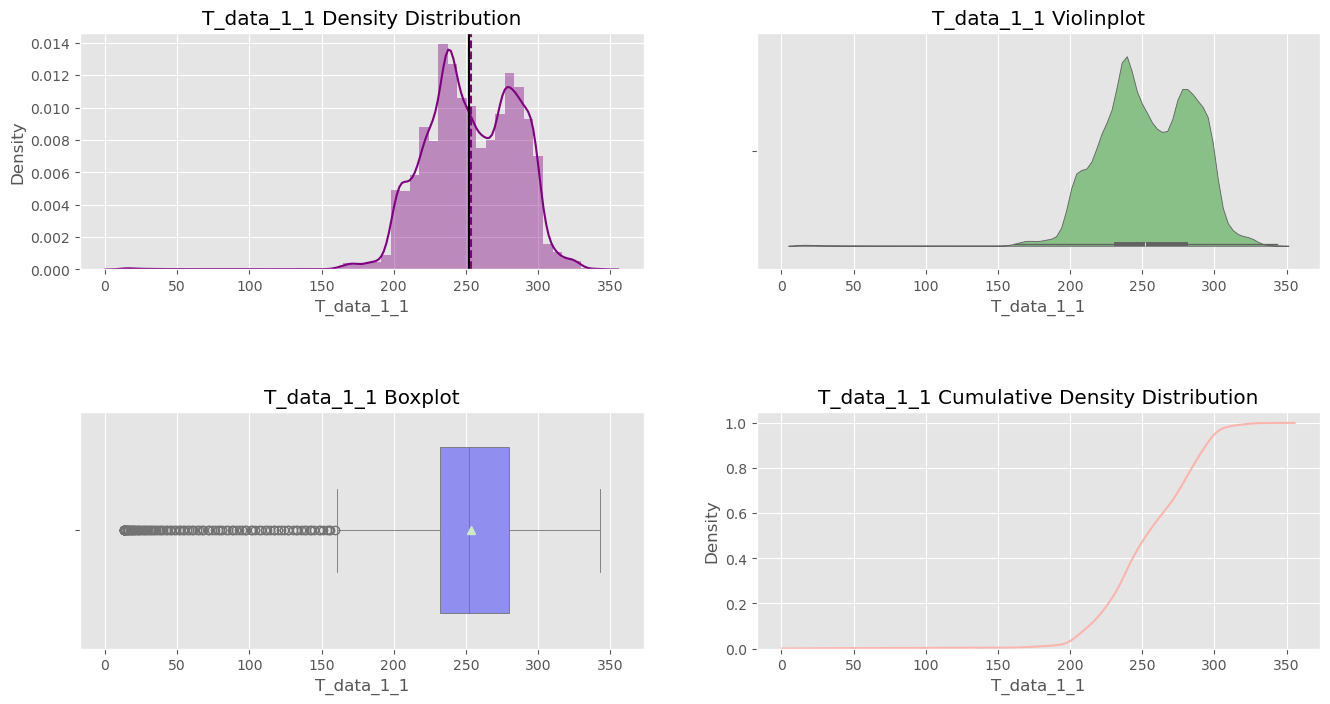

In [18]:
summary(data, "T_data_1_1")

#### Observations:
<br>1.For first chamber, The data is a mixture of more than one model 
<br>2.Has many outliers on left side.

5 Point Summary of T_data_1_2 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   168 |  231 |  254 |  280 |   341 |
+-------+-------+------+------+------+-------+


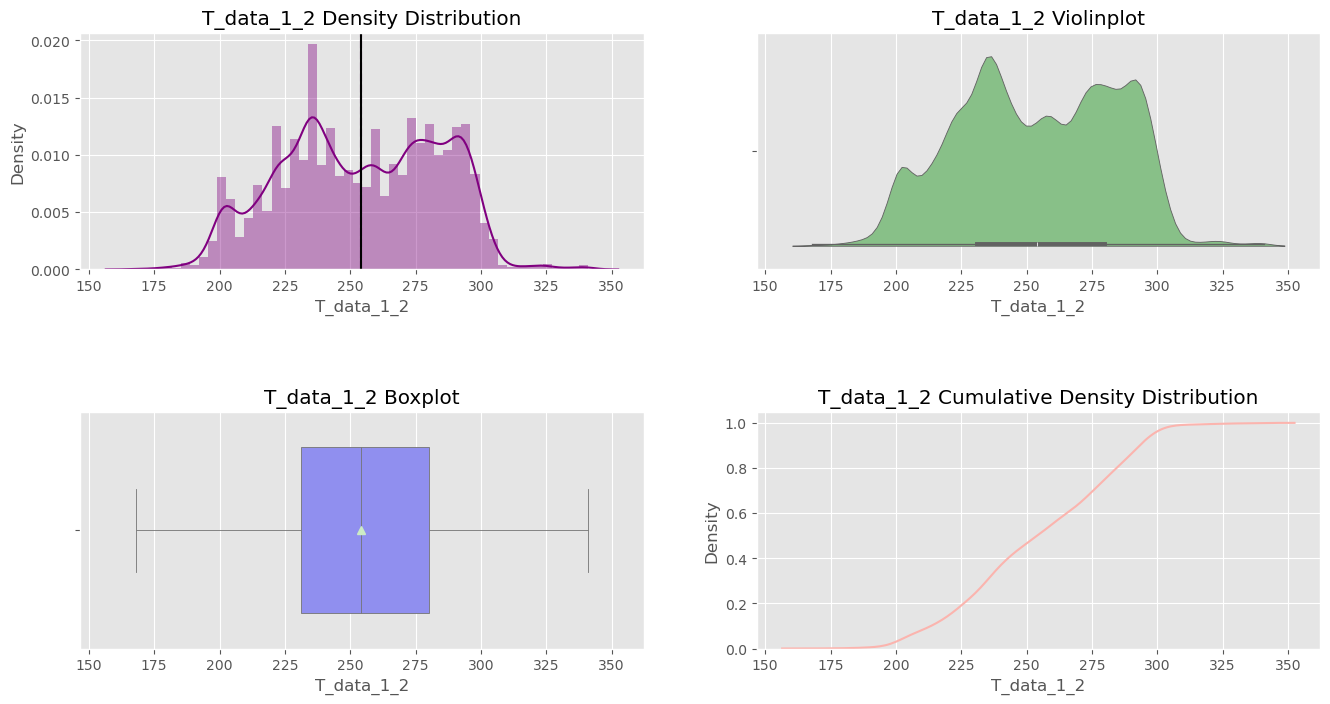

In [19]:
summary(data, "T_data_1_2")

#### Observations:
<br>1.Second sensor data doesn't show any outliers but the distribution is a mixture of multiple models.

5 Point Summary of T_data_1_3 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   183 |  232 |  252 |  279 |   339 |
+-------+-------+------+------+------+-------+


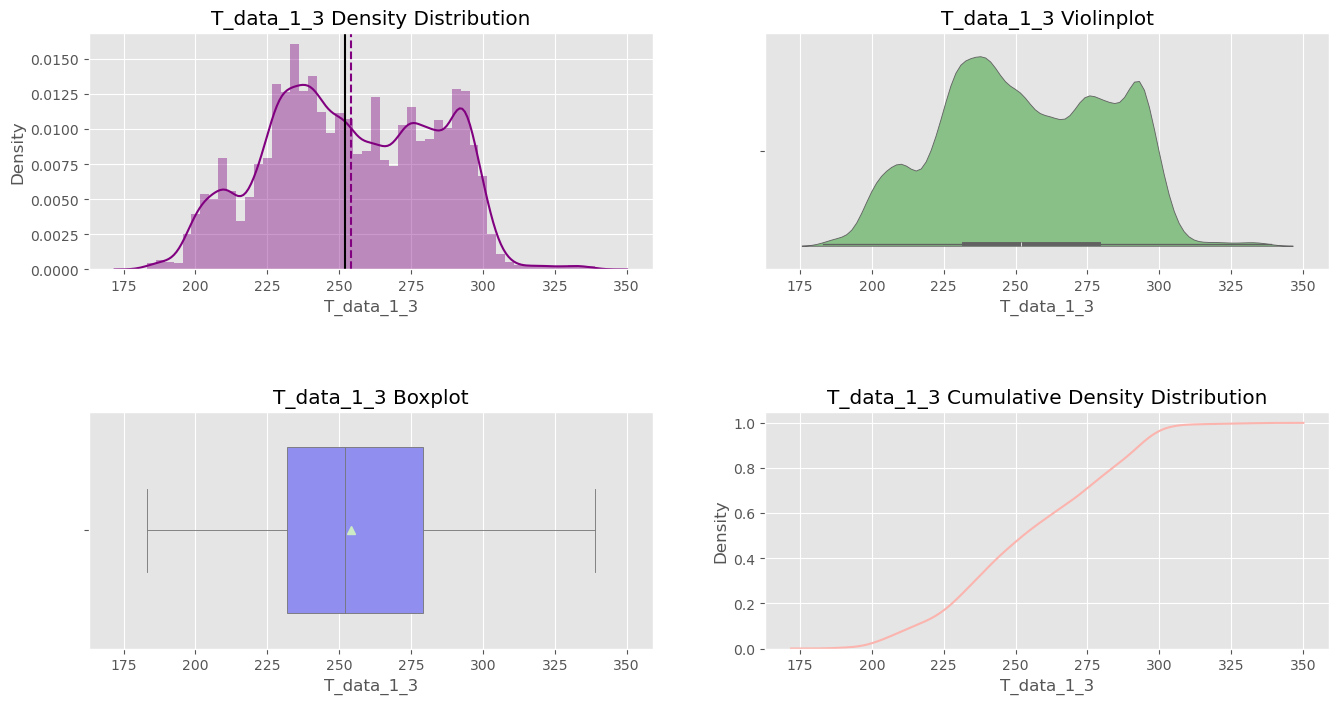

In [20]:
summary(data, "T_data_1_3")

#### Observations
<b><br>1.Third sensor data doesn't show any outliers but the distribution is a mixture of multiple models.


<b>2.There are no outliers in values recorded by the 2nd and 3rd sensor, so it seems like the values recorded by the 1st sensor might be having some issue. So, we will cap all the values lower than the minimum value recorded by 1st sensor to the average minimum value recorded by the 2nd or 3rd sensor.

In [23]:
# average min value of the 2nd and 3rd sensors is 175, so we will replace values less than 175 in first sensor with 175
data["T_data_1_1"].clip(lower=175, inplace=True)

### 2nd Chamber Values Analysis

5 Point Summary of T_data_2_1 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    70 |  325 |  344 |  363 |   436 |
+-------+-------+------+------+------+-------+


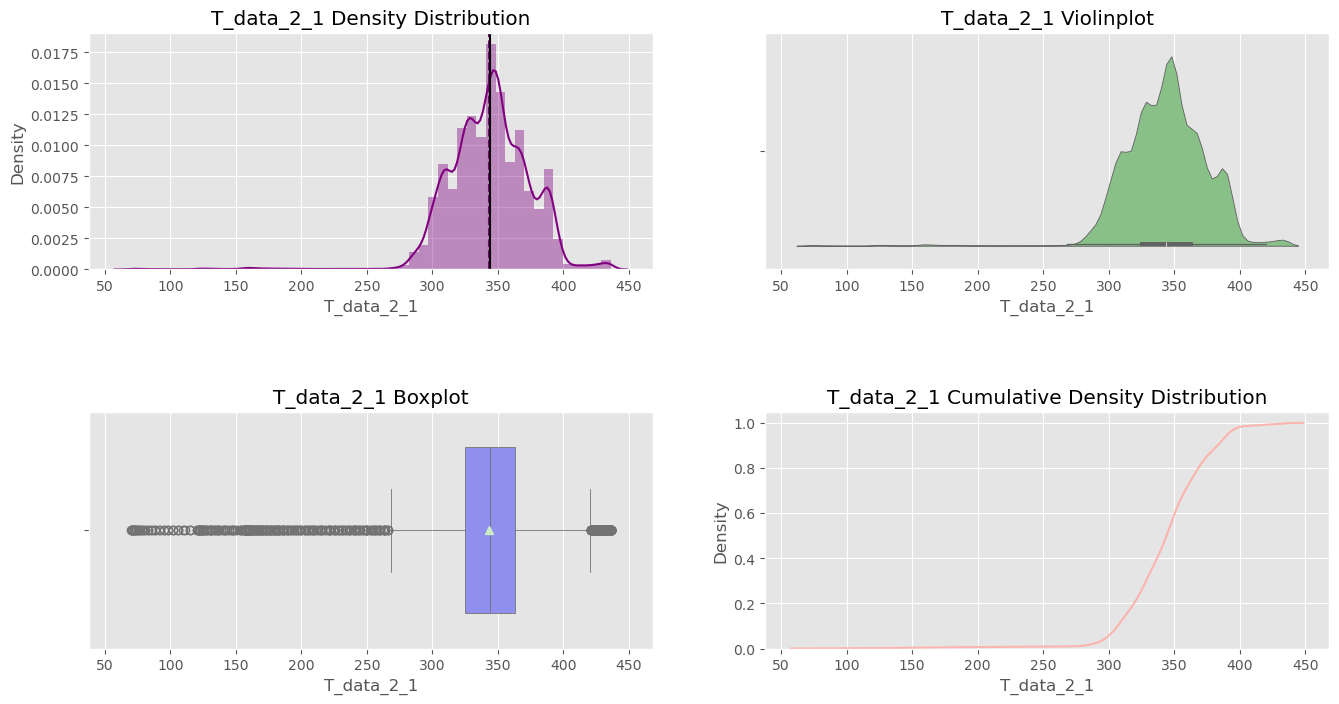

In [24]:
summary(data, "T_data_2_1")

#### Observerions 
#### <br>1.There are lower  end outliers for second chamber
#### 2.The distribution is almost normal distribution

5 Point Summary of T_data_2_2 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   113 |  326 |  344 |  364 |   598 |
+-------+-------+------+------+------+-------+


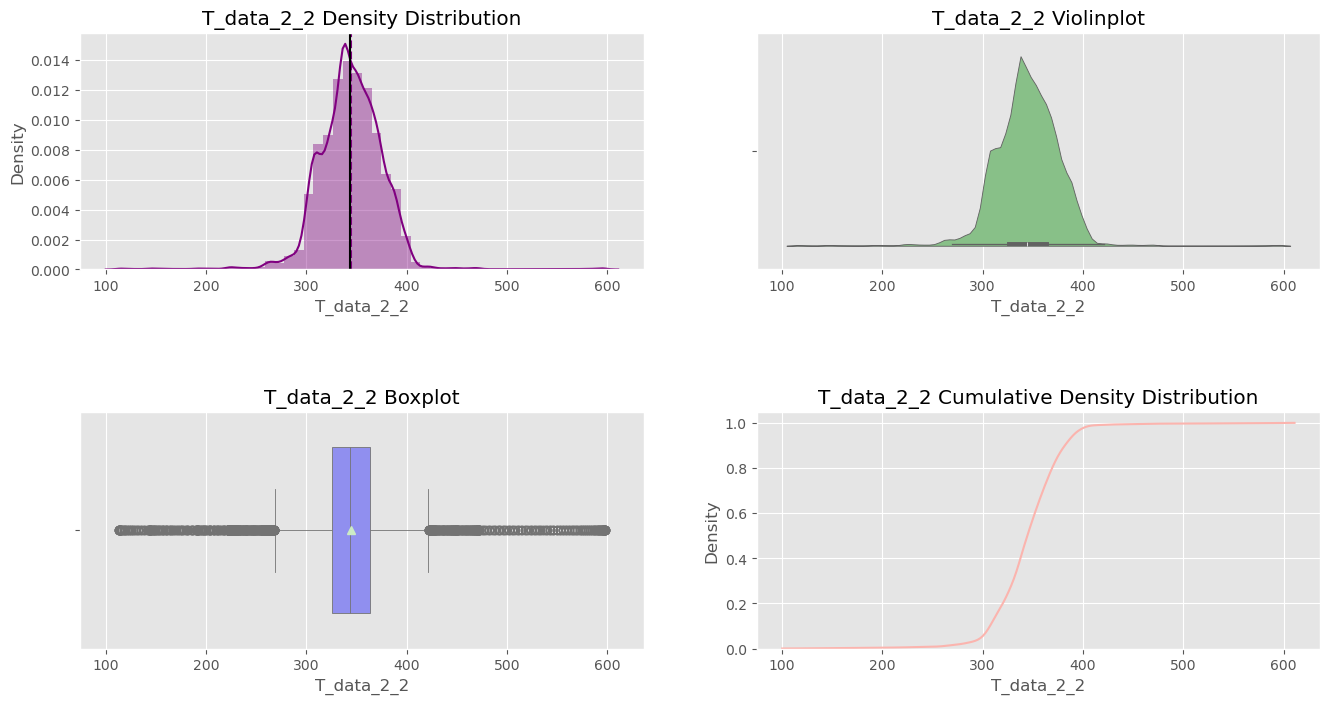

In [25]:
summary(data, "T_data_2_2")

#### Observations
#### lower and higher end outliers are noticed.
#### The distribution is left skewed normal distribution.

5 Point Summary of T_data_2_3 Attribute:

+-------+-------+-------+------+------+-------+
|       |   Min |    Q1 |   Q2 |   Q3 |   Max |
|-------+-------+-------+------+------+-------|
| Value |   107 | 322.5 |  343 |  363 |   433 |
+-------+-------+-------+------+------+-------+


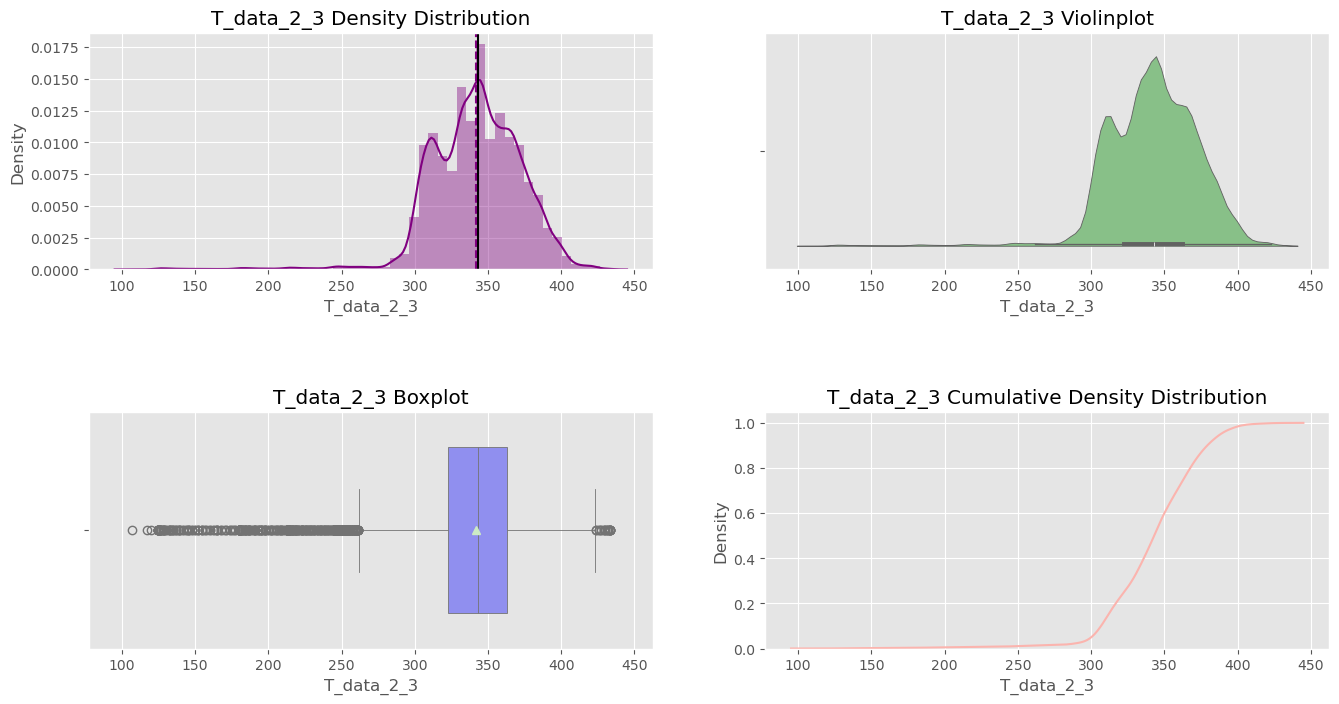

In [30]:
summary(data, "T_data_2_3")

#### Observations
#### lower and higher end outliers are noticed.
#### The distribution is left skewed normal distribution.

### 3rd Chamber Values Analysis

5 Point Summary of T_data_3_1 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   311 |  461 |  497 |  524 |  1024 |
+-------+-------+------+------+------+-------+


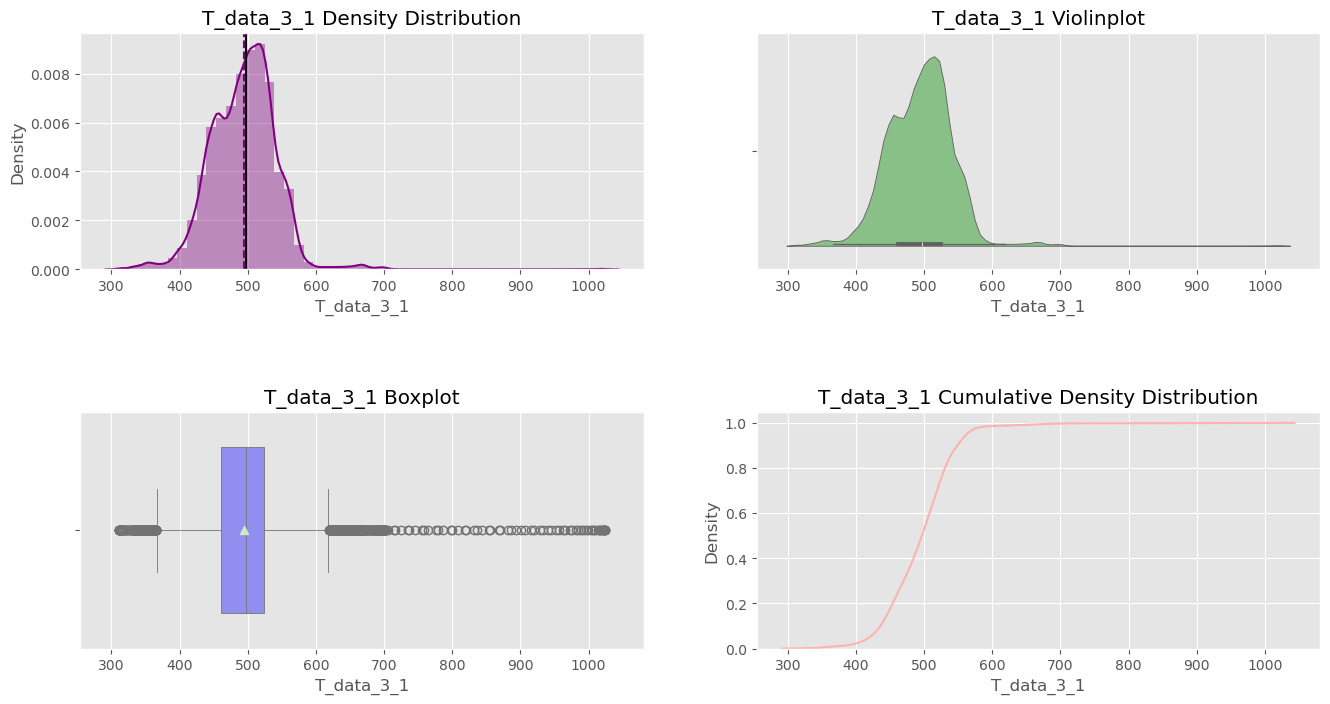

In [31]:
summary(data, "T_data_3_1")

#### Observations:
The distribution is almost normal with skewed on right side.

5 Point Summary of T_data_3_2 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   401 |  460 |  498 |  527 |   756 |
+-------+-------+------+------+------+-------+


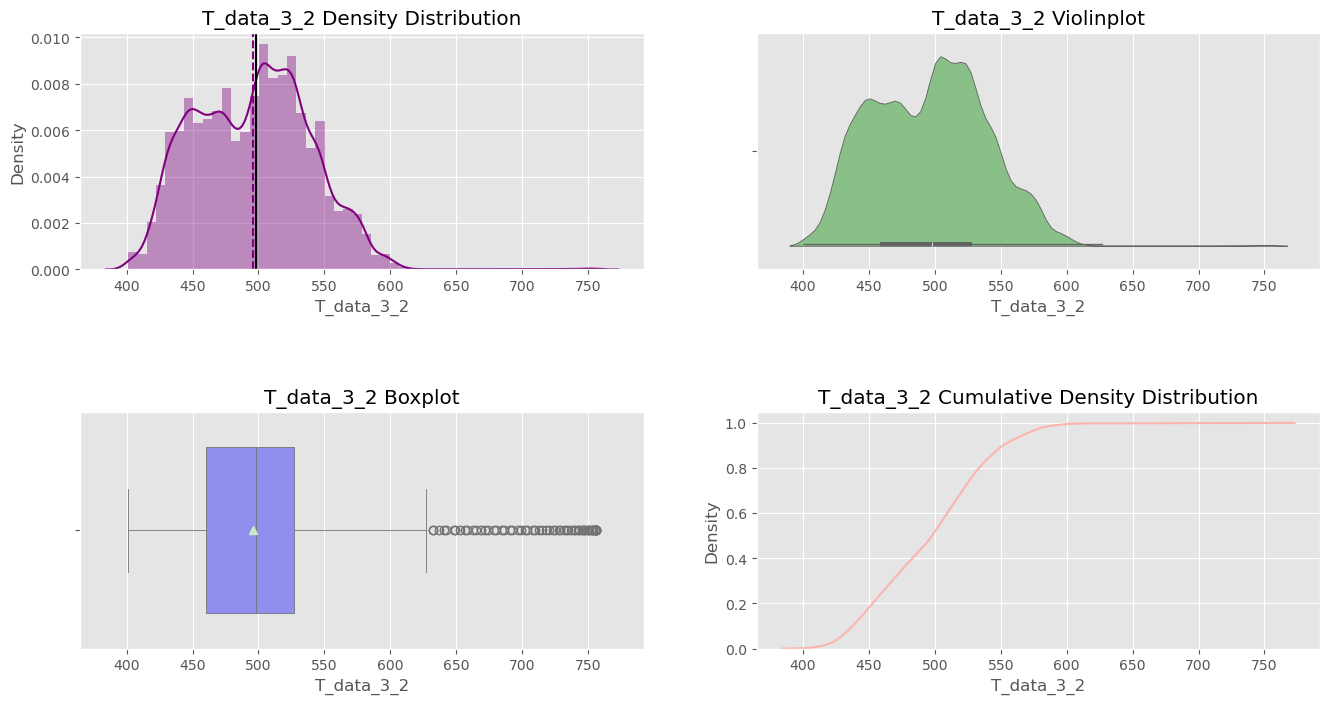

In [32]:
summary(data, "T_data_3_2")

#### Observations:
1. The data looks to be right skewed and seems almost normal distribution.

5 Point Summary of T_data_3_3 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   197 |  460 |  499 |  530 |   934 |
+-------+-------+------+------+------+-------+


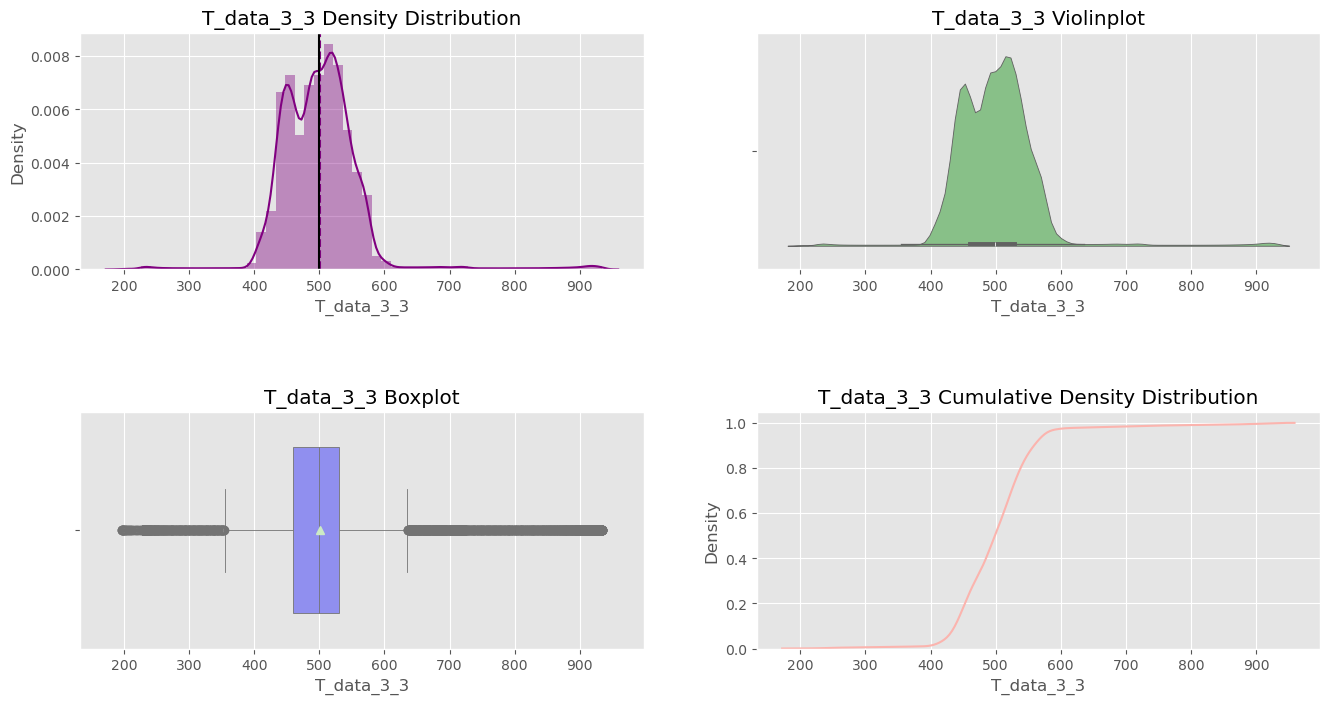

In [33]:
summary(data, "T_data_3_3")

#### Observations:
1. Outliers on both sides and more than one peak in the distribution

### 4th Chamber Values Analysis

5 Point Summary of T_data_4_1 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    53 |  324 |  343 |  362 |   912 |
+-------+-------+------+------+------+-------+


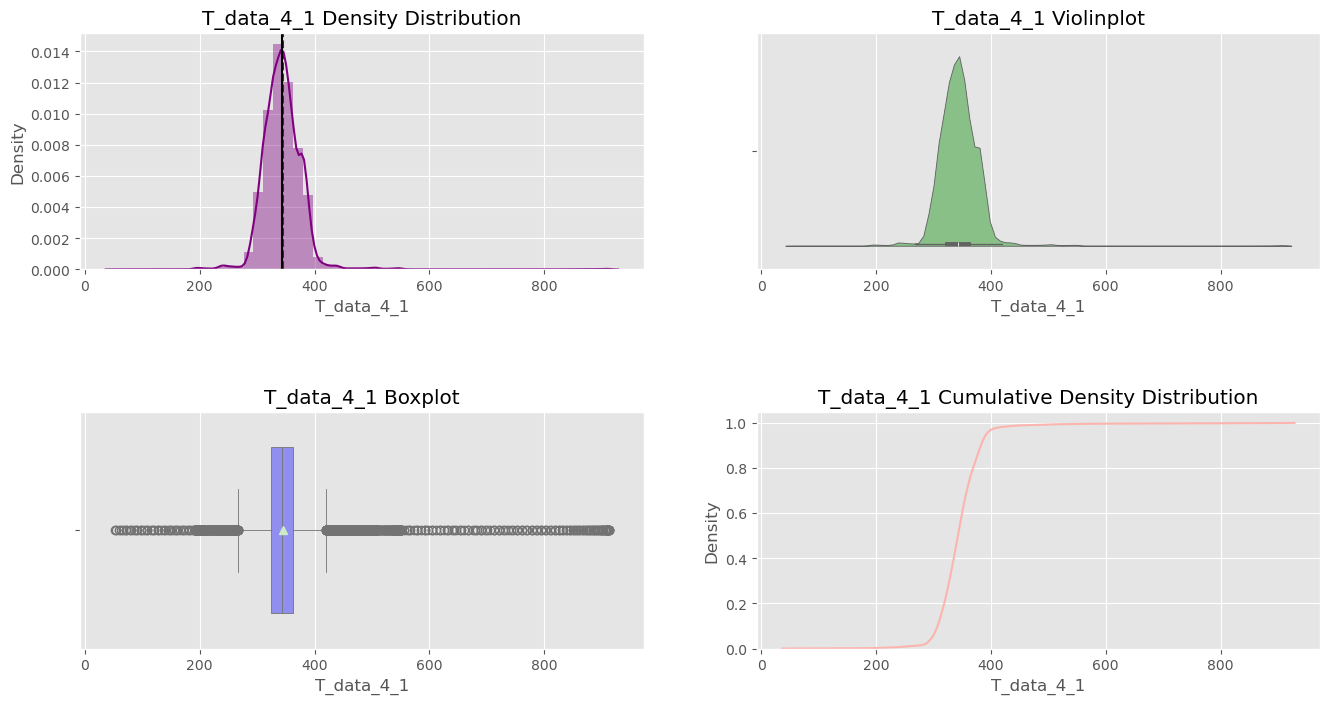

In [35]:
summary(data, "T_data_4_1")

#### Observations:
 approximately normally distributed with outliers and left and right end.

5 Point Summary of T_data_4_2 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    51 |  322 |  343 |  362 |   613 |
+-------+-------+------+------+------+-------+


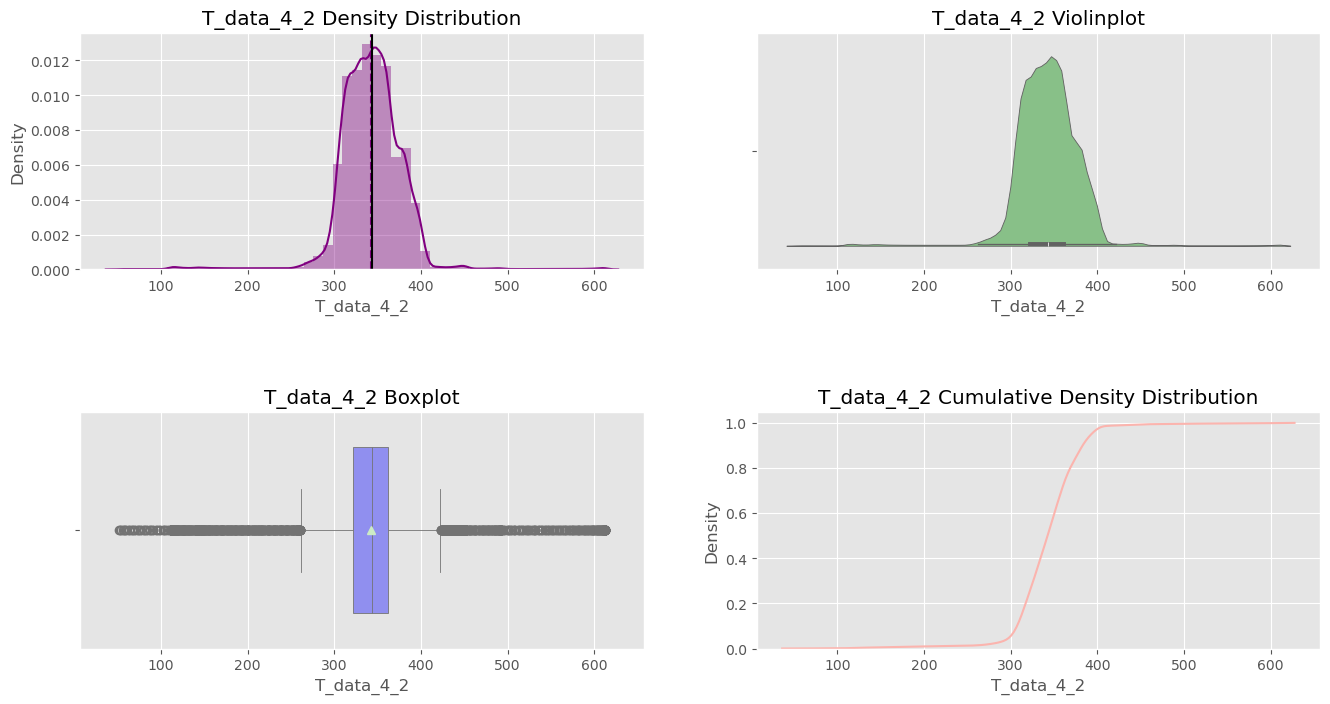

In [36]:
summary(data, "T_data_4_2")

#### Observations:
approximately normally distributed with outliers and left and right end.

5 Point Summary of T_data_4_3 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    52 |  326 |  344 |  361 |   695 |
+-------+-------+------+------+------+-------+


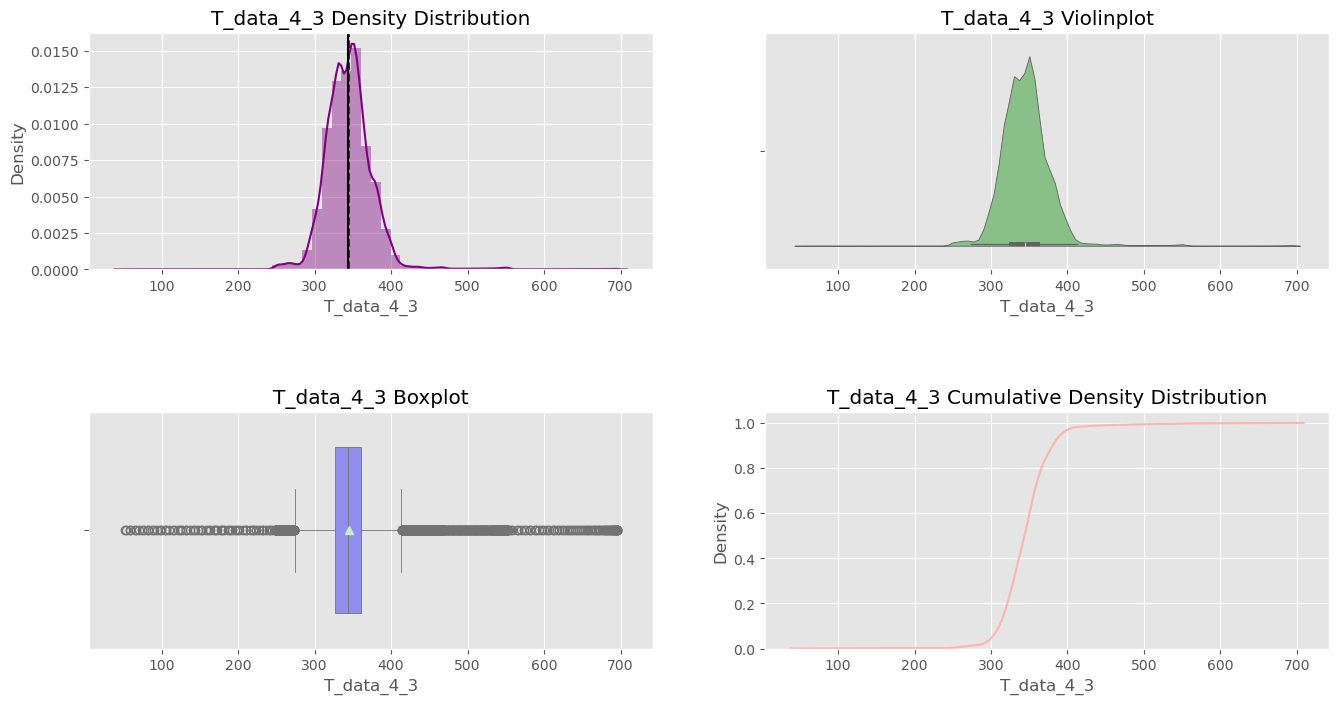

In [40]:
summary(data, "T_data_4_3")

#### Observations:
approximately normally distributed with many outliers and left and right end.

### 5th Chamber Values Analysis

5 Point Summary of T_data_5_1 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   114 |  226 |  245 |  267 |   319 |
+-------+-------+------+------+------+-------+


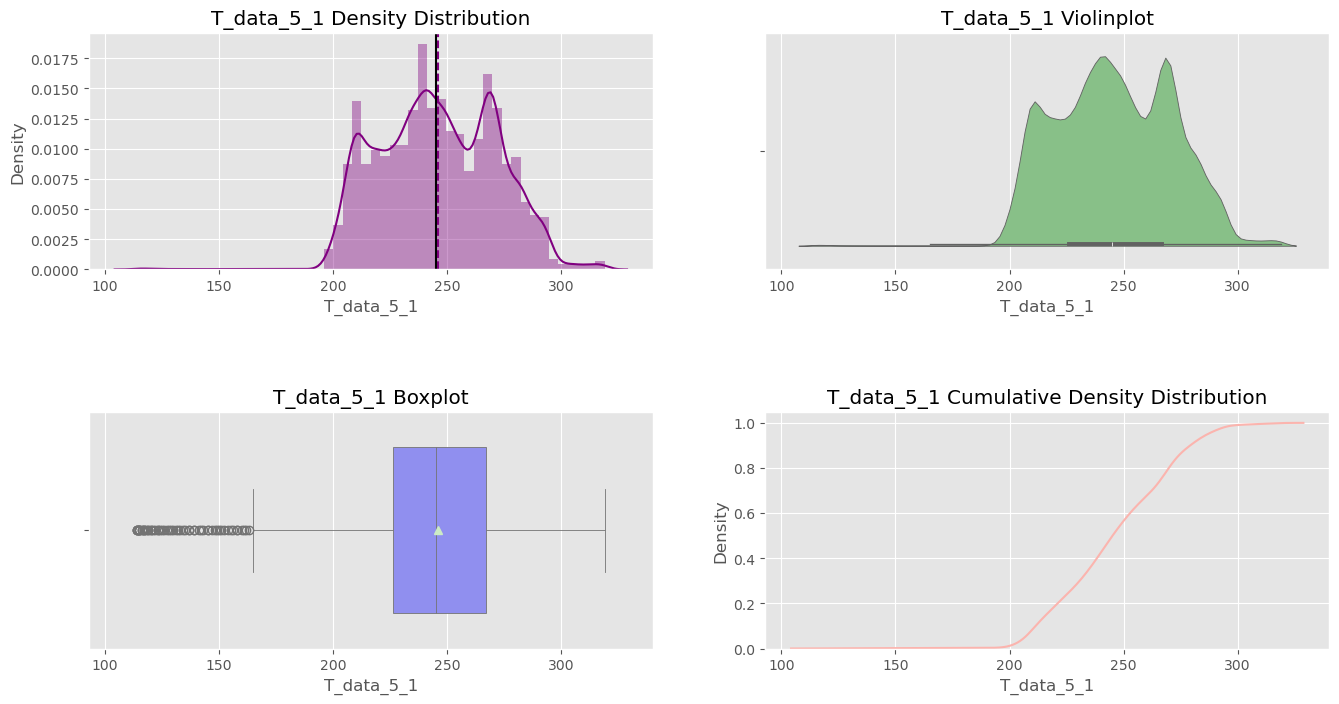

In [41]:
summary(data, "T_data_5_1")

#### Observations:
Distribution seems to be mixture of multiple models with many outliers and left and right end.

5 Point Summary of T_data_5_2 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   145 |  226 |  245 |  266 |   361 |
+-------+-------+------+------+------+-------+


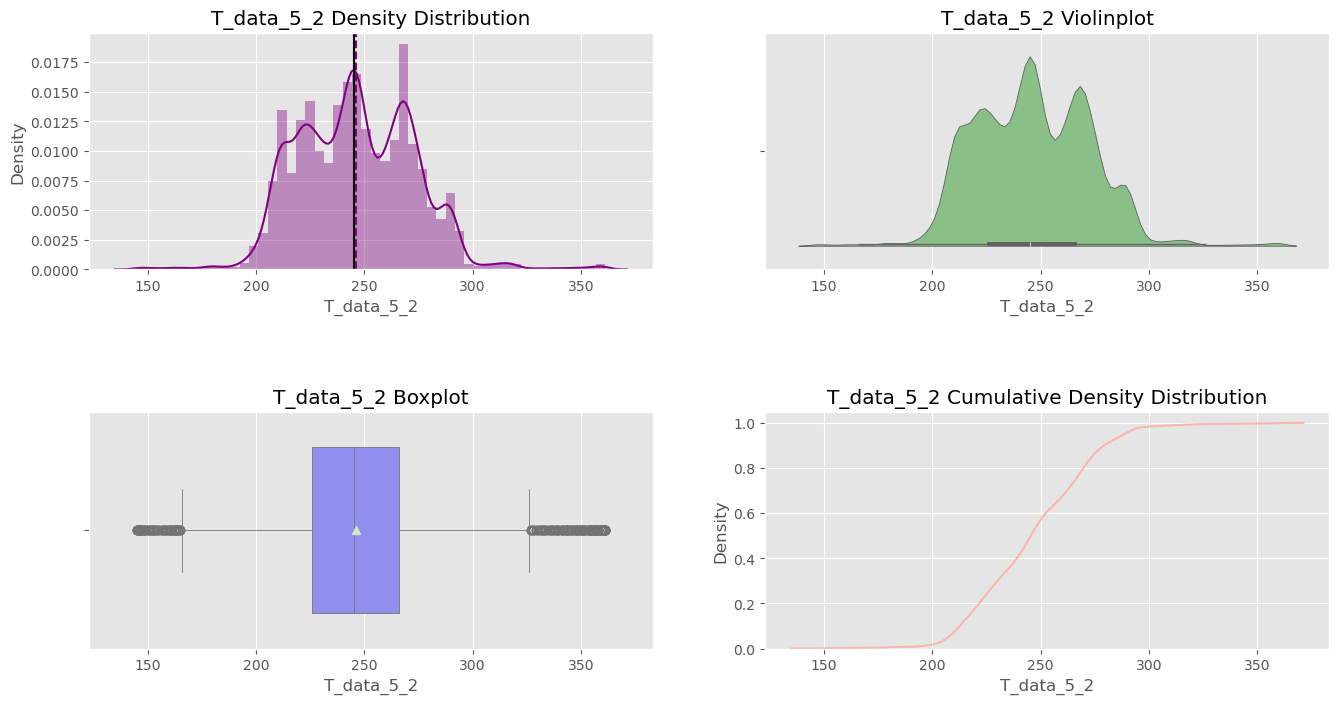

In [42]:
summary(data, "T_data_5_2")

#### Observations:
Distribution seems to be mixture of multiple models with many outliers outside the whiskers.

5 Point Summary of T_data_5_3 Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |   146 |  225 |  247 |  266 |   374 |
+-------+-------+------+------+------+-------+


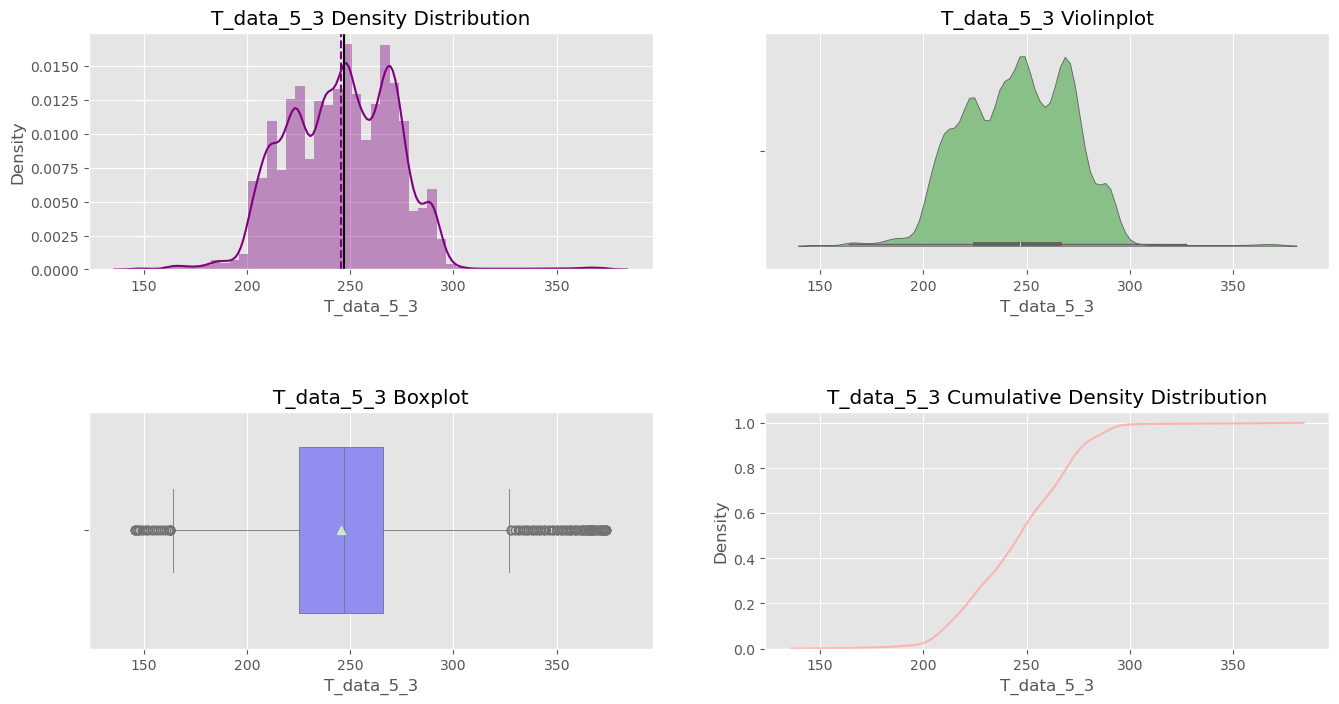

In [44]:
summary(data, "T_data_5_3")

#### Observations:
Distribution seems to be almost normal distribution with many outliers outside the whiskers.

The large difference in the temperatures off the 1st  and 2,3,4,5 sensors might be due to the location of the first sensor being different /placed far away from others

### H_data Values Analysis

5 Point Summary of H_data Attribute:

+-------+--------+--------+--------+---------+--------+
|       |    Min |     Q1 |     Q2 |      Q3 |    Max |
|-------+--------+--------+--------+---------+--------|
| Value | 144.41 | 157.35 | 170.47 | 182.135 | 203.68 |
+-------+--------+--------+--------+---------+--------+


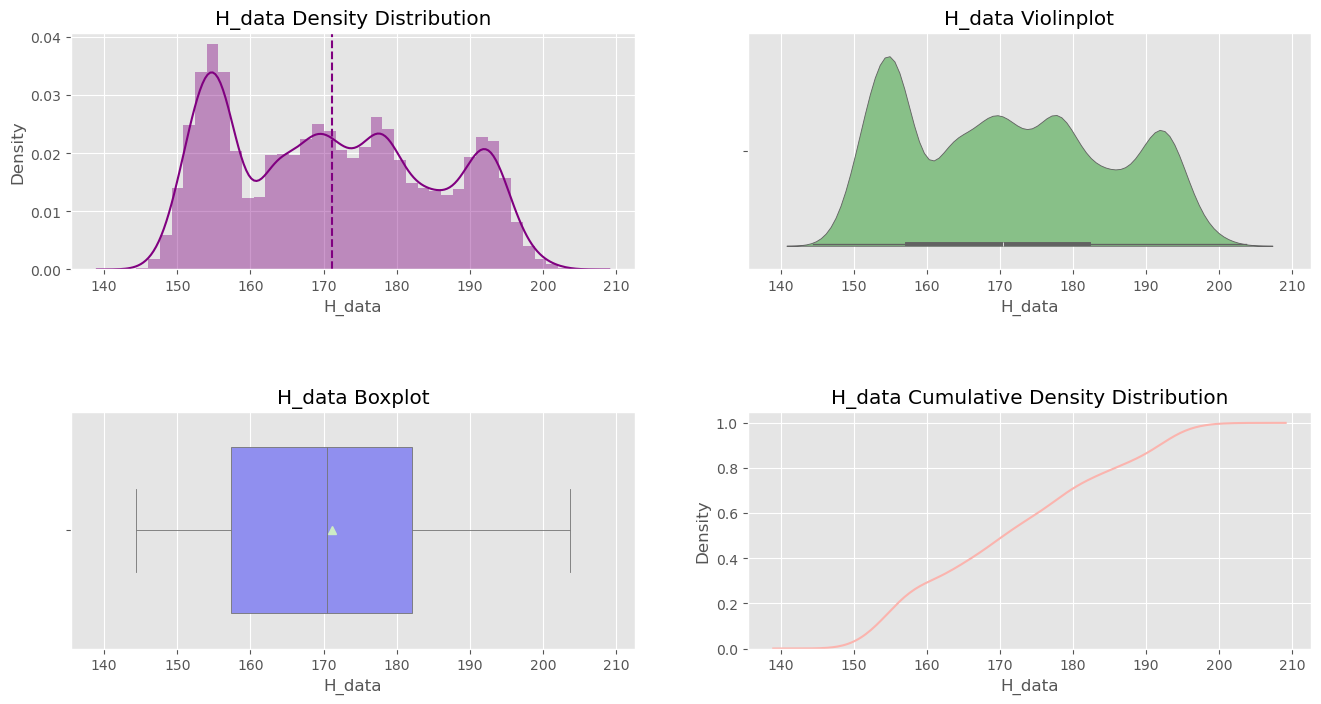

In [49]:
summary(data, "H_data")

#### Observations:
Distribution has many peaks.No outliers as such.

### AH_data Values Analysis

5 Point Summary of Ah_data Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |  4.38 | 6.81 | 7.52 | 8.32 | 10.74 |
+-------+-------+------+------+------+-------+


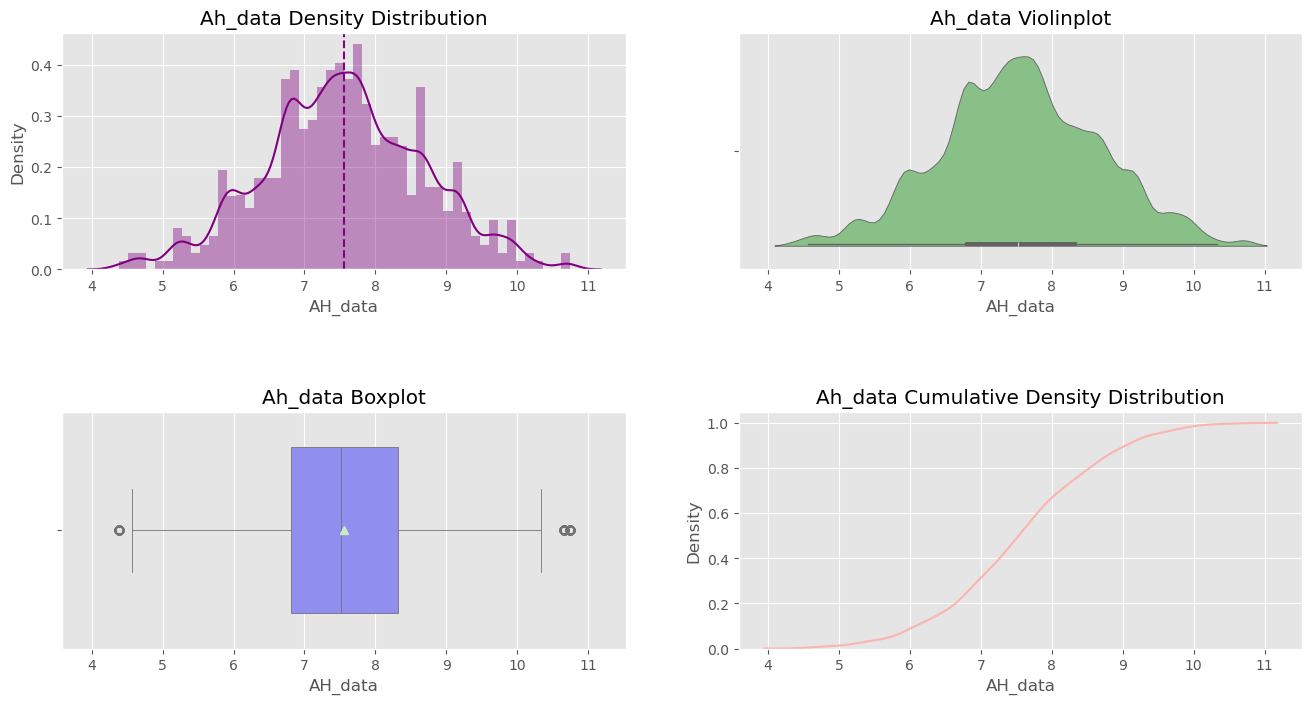

In [50]:
summary(data, "AH_data")

#### Observations:
Distribution looks normal and there are a few outliers.

### Quality Values Analysis

5 Point Summary of Quality Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |   54 |   66 |   77 |   100 |
+-------+-------+------+------+------+-------+


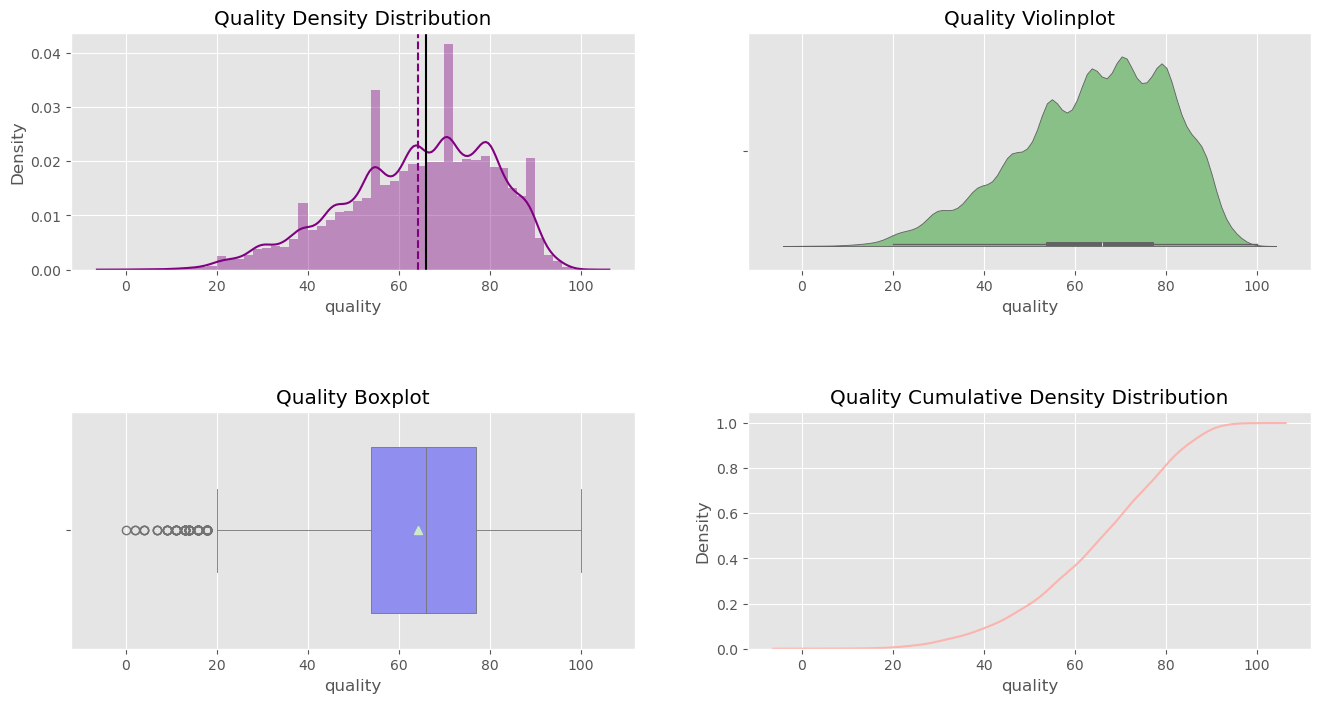

In [59]:
summary(data, "quality")

#### Observations:
quality is left skewed and it varies from 20 to 100

### Bi-variate Analysis

#### Goal of Bi-variate analysis is to find inter-dependencies between features.

#### Target vs. All numerical columns

In [117]:
# Below code plots box charts for each numerical against quality
def scatter_by_target(data: pd.DataFrame, numeric_columns, target):
    """
    The function takes a numerical column, target column as input
    and plots scatterplot chart

    Usage:
    ------

   
    """
    subplot_cols = 3
    subplot_rows = int(len(numeric_columns) / 3 + 1)
    plt.figure(figsize=(10, subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(subplot_rows, subplot_cols, i + 1)
        sns.scatterplot(
            data=data,
            x=target,
            y=col,
            palette="Blues"
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

#### Scatterplot for all columns against quality

['T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1', 'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3', 'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2', 'T_data_5_3', 'H_data', 'AH_data', 'quality']


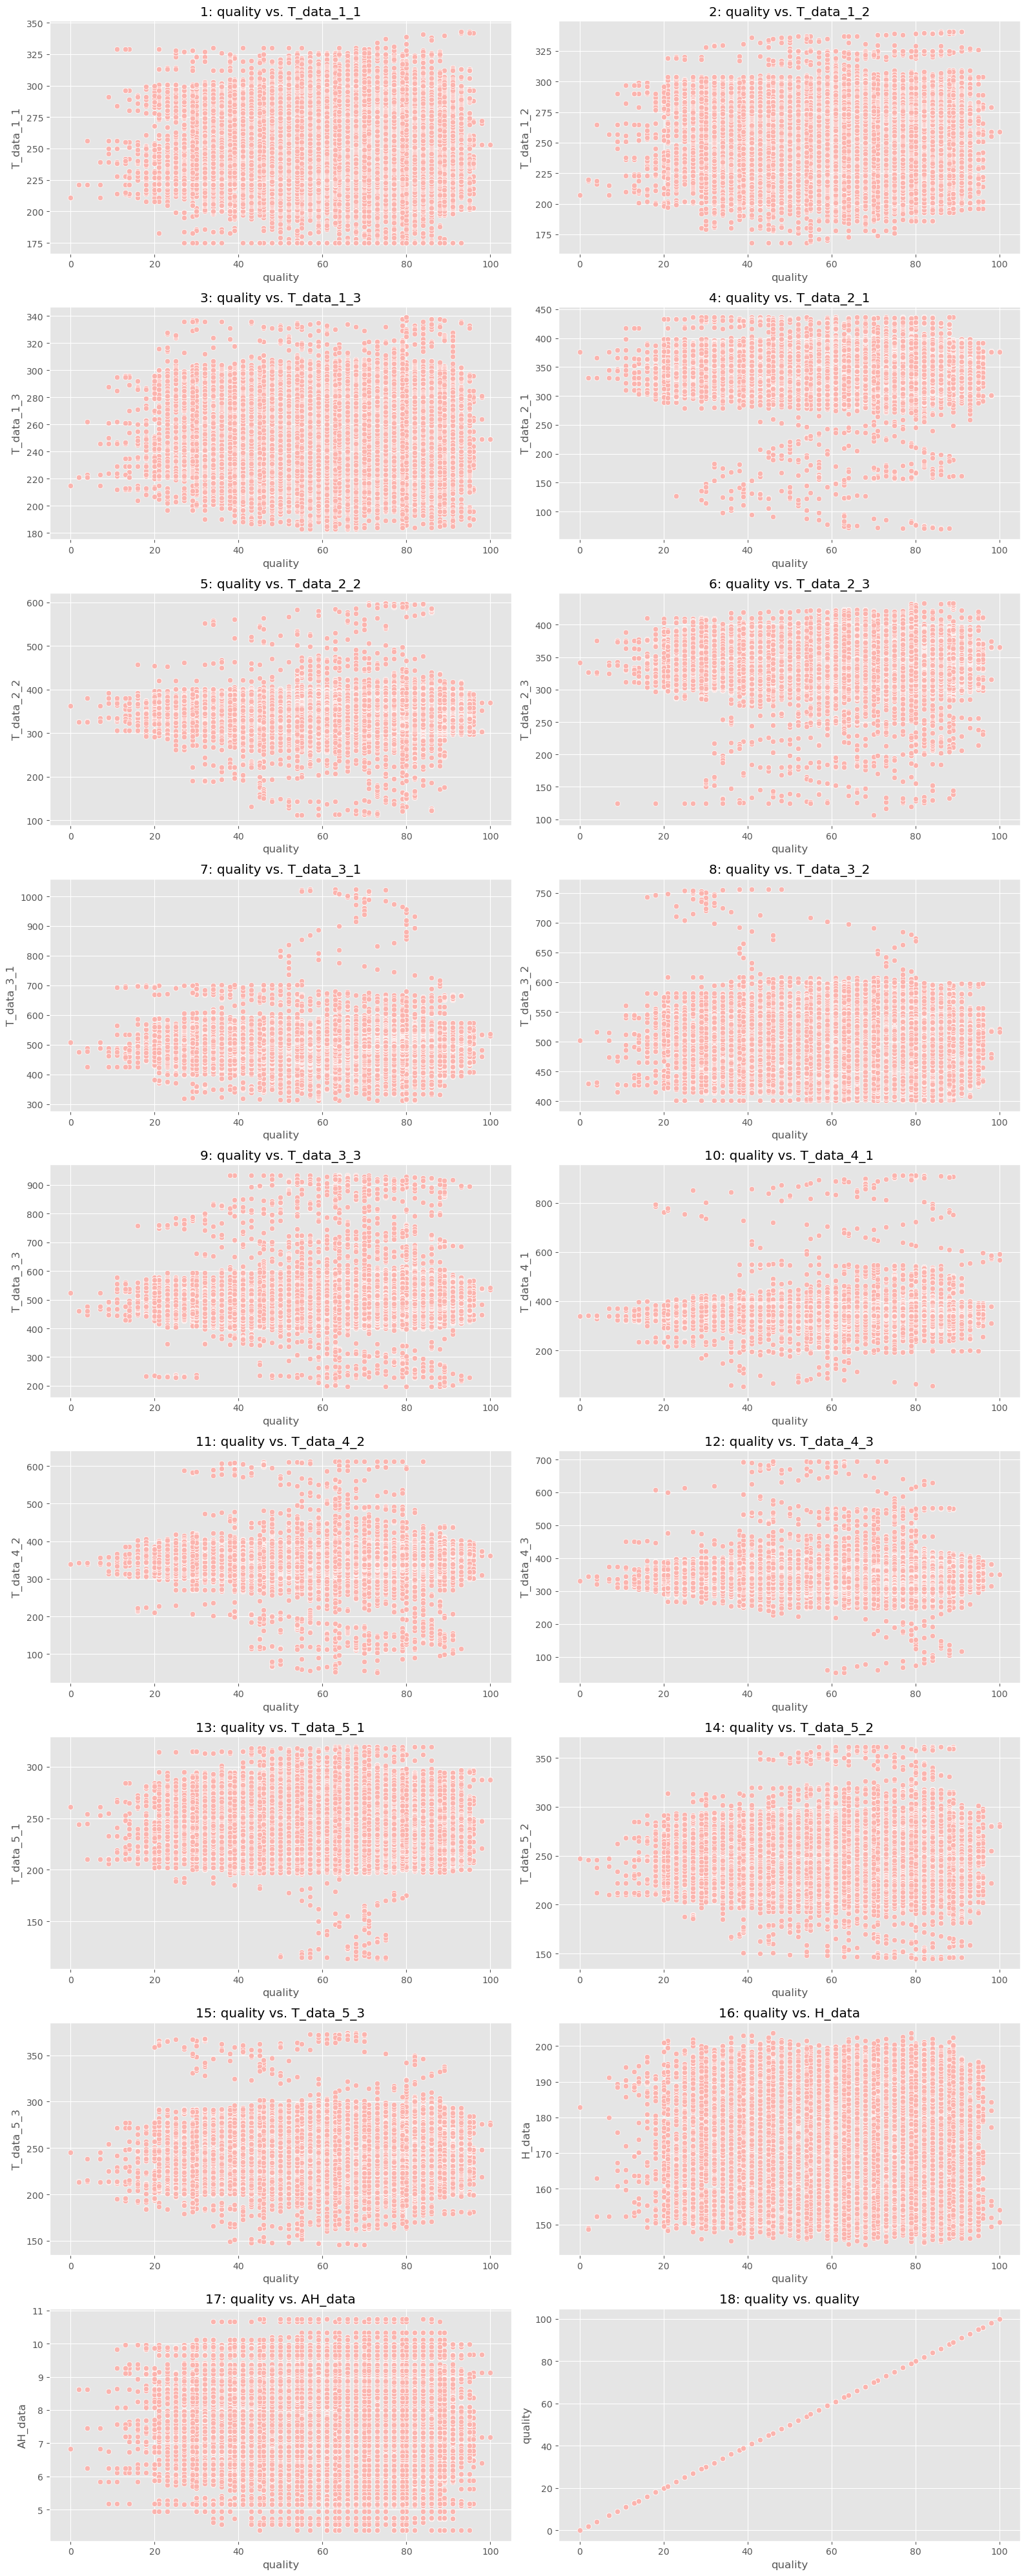

In [118]:
numeric_columns = data.columns.tolist()
#numeric_columns.remove("quality")
print(numeric_columns)
target_variable = "quality"
box_by_target(data, numeric_columns, target_variable)

### Observations:
#### <br> 1.quality vs AH_data: We could see that most of the observations have humidity between 5 and 10, and quality doesn't seem to make any specific pattern with AH_data.
#### <br> 2.quality vs H_data:We could see that usually, the volume entering inside the chamber doesn't have  much effect on the quality.
#### <br> 3.quality vs First chamber temperatures: The temperature in the first chamber doesn't seem to have any severe effect on the quality of beans.
#### The temperature in the first chamber is between 150 and 300.
#### <br> 4.quality vs Second  chamber temperatures: The temperature between 300 and 400 seems to enhance the quality of beans.
#### The temperature in the second chamber is between 250 and 400.
#### <br> 5.quality vs Third  chamber temperatures: The temperature between 300 and 400 seems to enhance the quality of beans.
#### The temperature in the second chamber is between 400 and 600.
#### <br> 6.quality vs Fourth  chamber temperatures: The temperature between 300 and 400 seems to enhance the quality of beans.
#### The temperature in the second chamber is between 200 and 450.
#### <br> 7.quality vs Firth  chamber temperatures: The temperature in the fifth chamber doesn't seem to have any severe effect on the quality of beans.
#### 
The temperature in the fifth chamberiss between 200 and 300..

### Correlation Matrix

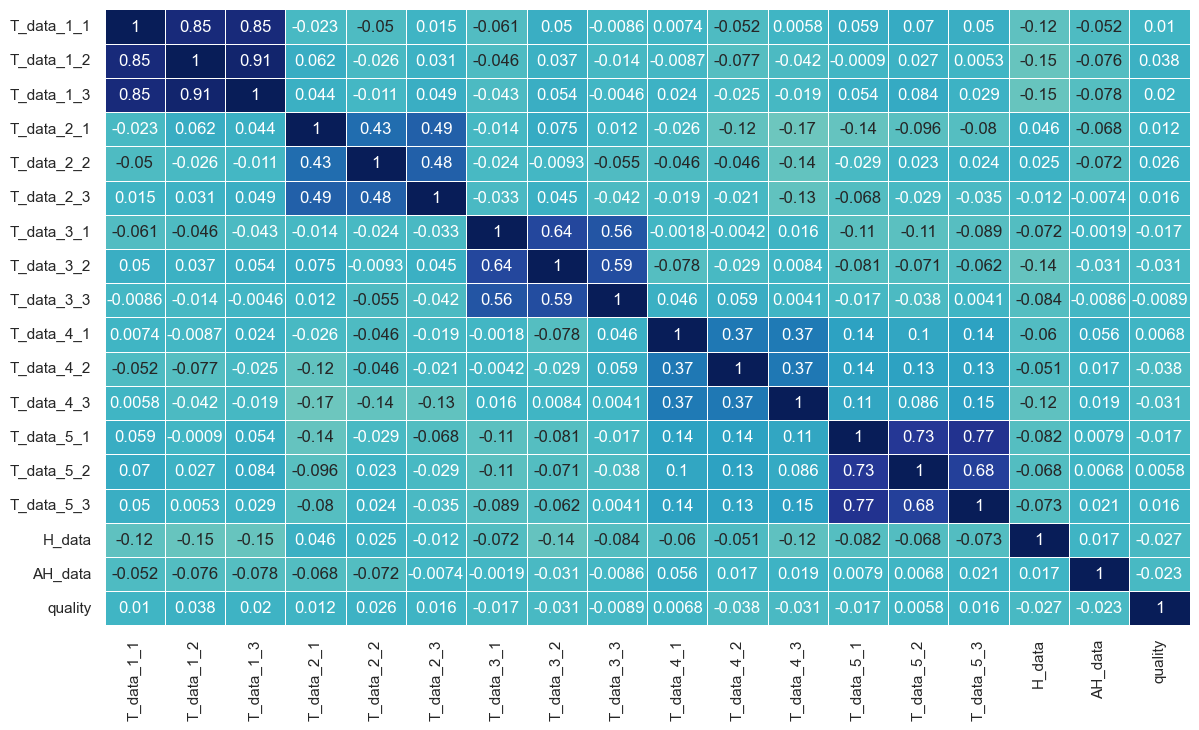

In [120]:
sns.set(rc={"figure.figsize": (14, 8)})
sns.heatmap(
    data.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu"
)
plt.show()

#### Observations:
The correlation is high between the tempertures with in a chamber

### Data Pre-processing

#### Train ,Validation Split

In [123]:
# Copy the dataframe
df =data.copy()


In [124]:
# Split train data into X and y 

X = df.drop(["quality"], axis=1)
y = df["quality"]

In [125]:
# Splitting data into Train and validation sets:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1
)

print(X_train.shape, X_val.shape, X_test.shape)

(17478, 17) (5827, 17) (5826, 17)


### Missing value treatment

#### As seen above, There were few missing values in AH_data and H_data, we will impute them using the median.
####  we will treat missing values after splitting train data into train and validation sets.

In [126]:
imputer = SimpleImputer(strategy="median")

In [127]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [129]:
# Checking for  missing values in train or test sets
print(X_train.isna().sum())
print("*" * 25)
print(X_val.isna().sum())
print("*" * 25)
print(X_test.isna().sum())

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
*************************
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
*************************
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64


### Building the Model

In [138]:
### Model Evaulation Function
# To compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# To compute different metrics to check the scores of a regression model
def model_score_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Model using Bagging

In [136]:
bag_estimator = BaggingRegressor(random_state=1)
bag_estimator.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [144]:
bag_estimator_model_train_perf = model_score_regression(
    bag_estimator, X_train, y_train
)
bag_estimator_model_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 2.635 1.811      0.975           0.974

In [145]:
bag_estimator_model_val_perf = model_score_regression(bag_estimator, X_val, y_val)
bag_estimator_model_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 5.946 4.433      0.865           0.865

#### Observations:
<br>The RMSE values for the Bagging Regressor model are low for both the train and validation datasets.
<br>On both the train and validation datasets, the Bagging Regressor model generalizes well.

### Gradient Boosting

In [146]:
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [147]:
gb_estimator_model_train_perf = model_score_regression(
    gb_estimator, X_train, y_train
)
gb_estimator_model_train_perf

RMSE    MAE  R-squared  Adj. R-squared
0 15.046 12.253      0.169           0.168

In [148]:
gb_estimator_model_val_perf = model_score_regression(gb_estimator, X_val, y_val)
gb_estimator_model_val_perf

RMSE    MAE  R-squared  Adj. R-squared
0 14.902 12.161      0.155           0.152

#### Observations:
The RMSE values for the Gradient Boost model are high for both the train and validation datasets.

### Adaboost

In [164]:
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [165]:
ab_regressor_model_train_perf = model_score_regression(
    ab_regressor, X_train, y_train
)
ab_regressor_model_train_perf

RMSE    MAE  R-squared  Adj. R-squared
0 16.514 13.754     -0.001          -0.002

In [166]:
ab_regressor_model_val_perf = model_score_regression(ab_regressor, X_val, y_val)
ab_regressor_model_val_perf

RMSE    MAE  R-squared  Adj. R-squared
0 16.260 13.530     -0.006          -0.009

#### Observations
<br>1.The AdaBoost model is overfitting and does not generalize well on both the train and validation datasets.

### Xgboost

In [149]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [150]:
xgb_estimator_model_train_perf = model_score_regression(
    xgb_estimator, X_train, y_train
)
xgb_estimator_model_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 7.755 6.061      0.779           0.779

In [151]:
xgb_estimator_model_val_perf = model_score_regression(xgb_estimator, X_val, y_val)
xgb_estimator_model_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 9.121 7.180      0.683           0.683

#### Observations:
The RMSE values for the XGBoost model are high for both the train and validation datasets.

### Decision Tree

In [154]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [158]:
dtree_model_train_perf = model_score_regression(dtree, X_train, y_train)
dtree_model_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 0.000 0.000      1.000           1.000

In [159]:
dtree_model_val_perf = model_score_regression(dtree, X_val, y_val)
dtree_model_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 7.418 5.195      0.791           0.790

#### Observations
Decision Tree is overfitting the data

### Random Forest

In [160]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [161]:
rf_estimator_model_train_perf = model_score_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 2.023 1.502      0.985           0.985

In [162]:
rf_estimator_model_val_perf = model_score_regression(rf_estimator, X_val, y_val)
rf_estimator_model_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 5.313 4.008      0.893           0.892

#### Observations:
Random Forest also overfitting

### Model Performance Check

In [167]:
# performance comparison on Training data

model_train_df = pd.concat(
    [
        dtree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bag_estimator_model_train_perf.T,
        ab_regressor_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
    ],
    axis=1,
)
model_train_df.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Training performance comparison:")
model_train_df.T

Training performance comparison:


RMSE    MAE  R-squared  Adj. R-squared
Decision tree      0.000  0.000      1.000           1.000
Random forest      2.023  1.502      0.985           0.985
Bagging Regressor  2.635  1.811      0.975           0.974
Adaboost          16.514 13.754     -0.001          -0.002
Gradient Boosting 15.046 12.253      0.169           0.168
Xgboost            7.755  6.061      0.779           0.779

In [170]:
# Validation performance comparison

model_val_df = pd.concat(
    [
        dtree_model_val_perf.T,
        rf_estimator_model_val_perf.T,
        bag_estimator_model_val_perf.T,
        ab_regressor_model_val_perf.T,
        gb_estimator_model_val_perf.T,
        xgb_estimator_model_val_perf.T,
    ],
    axis=1,
)
model_val_df.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Validation performance comparison:")
model_val_df.T

Validation performance comparison:


RMSE    MAE  R-squared  Adj. R-squared
Decision tree      7.418  5.195      0.791           0.790
Random forest      5.313  4.008      0.893           0.892
Bagging Regressor  5.946  4.433      0.865           0.865
Adaboost          16.260 13.530     -0.006          -0.009
Gradient Boosting 14.902 12.161      0.155           0.152
Xgboost            9.121  7.180      0.683           0.683

#### Observations
- RMSE value is low and good Adj. R-squared values for the following models:
  - Random Forest 
  - Bagging Regressor
  - Decision Tree
- So, we will tune these 3 models.

### Hyperparameter Tuning

### Tuning Random Forest Regressor model

In [175]:
%%time 

rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, n_iter=40, n_jobs = -1, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'max_features': 'log2', 'max_depth': None} with CV score=0.8741020159488982:
CPU times: total: 25.7 s
Wall time: 6min 7s


In [176]:
# Creating new pipeline with best parameters
rf_tuned = RandomForestRegressor(
    random_state=1, max_depth=None, max_features="log2", n_estimators=110
)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=110, random_state=1)

In [177]:
rf_tuned_train_perf = model_score_regression(rf_tuned, X_train, y_train)
rf_tuned_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 1.918 1.424      0.986           0.986

In [178]:
rf_tuned_val_perf = model_score_regression(rf_tuned, X_val, y_val)
rf_tuned_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 4.986 3.756      0.905           0.905

#### Observations:
After hyperparameter tuning, the Random Forest model's performance improved.

### Tuning Bagging Regressor model

In [184]:
%%time 

# Defining the model
Model = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [50, 100, 120, 150],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=20, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 120, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.8601866727447588:
CPU times: total: 32.8 s
Wall time: 8min 35s


In [185]:
# Creating new pipeline with best parameters
bag_tuned = BaggingRegressor(
    random_state=1, max_samples=0.7, max_features=0.9, n_estimators=120
)

bag_tuned.fit(X_train, y_train)

BaggingRegressor(max_features=0.9, max_samples=0.7, n_estimators=120,
                 random_state=1)

In [186]:
bag_tuned_train_perf = model_score_regression(bag_tuned, X_train, y_train)
bag_tuned_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 2.943 2.227      0.968           0.968

In [188]:
bag_tuned_val_perf = model_score_regression(bag_tuned, X_val, y_val)
bag_tuned_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 5.767 4.404      0.873           0.873

#### Observations
- Bagging Regressor is slightly overfitting the train data but overall the performance has improved.

### Tuning Decision Tree Regressor model

In [189]:
%%time 

# Choose the type of classifier
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(15,20)) + [None], 
              'min_samples_leaf': [1, 3] + [None],
              'max_leaf_nodes' : [5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5, n_jobs = -1, verbose = 2, n_iter = 100)
randomized_cv = randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_depth': None} with CV score=0.7284531294059423:
CPU times: total: 3.39 s
Wall time: 24.9 s


In [190]:
dtree_tuned = DecisionTreeRegressor(
    random_state=1,
    max_depth=None,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
)

dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, random_state=1)

In [191]:
dtree_tuned_train_perf = model_score_regression(dtree_tuned, X_train, y_train)
dtree_tuned_train_perf

RMSE   MAE  R-squared  Adj. R-squared
0 1.520 1.127      0.992           0.992

In [192]:
dtree_tuned_val_perf = model_score_regression(dtree_tuned, X_val, y_val)
dtree_tuned_val_perf

RMSE   MAE  R-squared  Adj. R-squared
0 7.634 5.381      0.778           0.778

 #### Observations:
 The decision tree model is overfitting and does not generalize well on both train and validation data.

##  Performance comparison for Models and choosing the final model

In [205]:
# Training performance comparison

model_train_comp_df = pd.concat(
    [
        dtree_tuned_train_perf.T,
        bag_tuned_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
model_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Training performance comparison:")
model_train_comp_df.T

Training performance comparison:


RMSE   MAE  R-squared  Adj. R-squared
Tuned Decision Tree     1.520 1.127      0.992           0.992
Tuned Bagging regressor 2.943 2.227      0.968           0.968
Tuned Random forest     1.918 1.424      0.986           0.986

In [194]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_tuned_val_perf.T,
        bag_tuned_val_perf.T,
        rf_tuned_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


RMSE   MAE  R-squared  Adj. R-squared
Tuned Decision Tree     7.634 5.381      0.778           0.778
Tuned Bagging regressor 5.767 4.404      0.873           0.873
Tuned Random forest     4.986 3.756      0.905           0.905

### Observations:
- For both the train and validation sets, Random Forest has a low RMSE and a high Adj. R-squared value.
- As a result, as the final model, we will use Random Forest tuned with oversampled data.

In [204]:
# To check the performance on test set
rf_test = model_score_regression(rf_tuned, X_test, y_test)
rf_test

RMSE   MAE  R-squared  Adj. R-squared
0 4.960 3.746      0.907           0.907

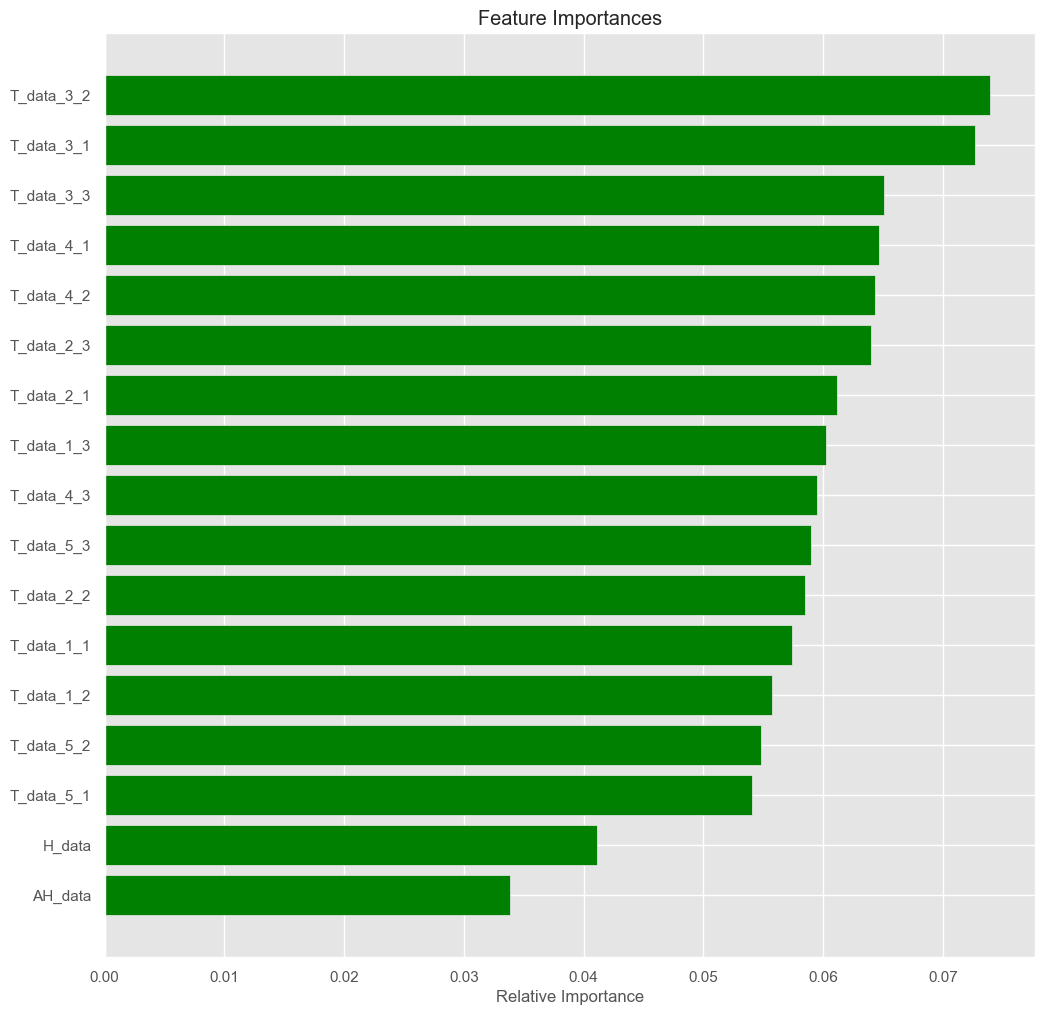

In [197]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- T_Data_3_2 is the most important feature followed by T_Data_3_1 and T_Data_4_2.

### using  Pipelines to build the final model

In [198]:
Model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "Random forest",
            RandomForestRegressor(
                random_state=1, max_depth=None, max_features="log2", n_estimators=110
            ),
        ),
    ]
)

In [199]:
# Separating the target variable and other variables
X = df.drop(columns="quality")
Y = df["quality"]

In [200]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)

(20391, 17) (8740, 17)


In [201]:
Model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Random forest',
                 RandomForestRegressor(max_features='log2', n_estimators=110,
                                       random_state=1))])

In [203]:
# Let's check the performance on test set
Pipeline_model_test = model_score_regression(Model, X_test, y_test)
Pipeline_model_test

RMSE   MAE  R-squared  Adj. R-squared
0 4.463 3.378      0.925           0.925

### Business Insights and Conclusions

 ##### 1.Random forest regressor provides the best results with 90% R-squared and 3.7 Mean Absolute Error, hence this model can be used further for predictions.
##### 2.T_Data_3_2, T_Data_3_1 and T_Data_4_2 are the important features used by the predictive model, which shows that the temperature of the chamber (especially the 3rd and 4th ones) plays a very important role in deciding the quality of coffee beans.

##### 3.This model also shows first sensor in all the chambers provided a completely different range of  temperature than others,which might be far away from the beans, we can use this information to optimize the location of sensor for yielding best results on quality.

##### 4.The quality rating provided by the model can be used for creating a pricing model based on the quality level

##### 5.This model can be used to automate manual quality to increase through put while achieving  better accuracy.
